In [166]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pylab import rcParams
import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [83]:
# loading last year data from dataset 
data = pd.read_csv('test_bitcoin.csv')
data.head()

,Unnamed: 0,asset_id,time,open,close,high,low,volume,market_cap,url_shares,...,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance,percent_change_24h
0,0,1,1579910400,8374.563305,8338.483527,8374.563305,8338.483527,8337279240,1.508163e+11,14526,...,NaN,NaN,26799,66250,1,293688,22.557953,2.286037e+11,65.972805,-1.059191
1,1,1,1579996800,8487.165177,8581.896879,8581.896879,8487.165177,8671821822,1.536224e+11,15653,...,NaN,NaN,24638,67404,1,282643,23.847751,2.372745e+11,64.744604,2.919156
2,2,1,1580083200,8623.902828,8869.566390,8869.566390,8623.902828,11994183173,1.584558e+11,23000,...,NaN,NaN,26381,95172,1,359881,26.445408,2.439090e+11,64.965124,3.352050
3,3,1,1580169600,8961.291095,9351.783109,9351.783109,8961.291095,15305415703,1.639961e+11,21690,...,NaN,NaN,19196,103863,1,367873,28.233385,2.551600e+11,64.271886,5.436756
4,4,1,1580256000,9303.009612,9259.615291,9303.009612,9217.970302,14233710766,1.683224e+11,21249,...,NaN,NaN,39412,92038,1,332949,27.643273,2.532066e+11,66.476298,-0.985564


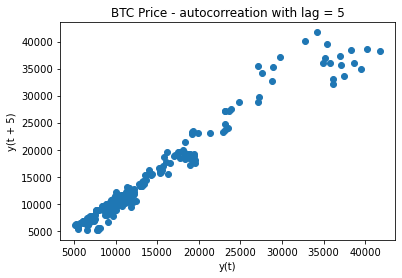

In [74]:
# our target variable will be closing price
# before building a Autoregrssion model, lets see if theres a cross correation 
plt.figure()
lag_plot(data['open'], lag =5)
plt.title('BTC Price - autocorreation with lag = 5')
plt.show()

In [84]:
df = data[['time', 'close']]

In [77]:
df.head()

,time,close
0,1579910400,8338.483527
1,1579996800,8581.896879
2,1580083200,8869.566390
3,1580169600,9351.783109
4,1580256000,9259.615291


In [78]:
#df['time'] = df['time'].apply(lambda x : (datetime.fromtimestamp(x) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [79]:
df.head()

,time,close
0,2020-01-24,8338.483527
1,2020-01-25,8581.896879
2,2020-01-26,8869.566390
3,2020-01-27,9351.783109
4,2020-01-28,9259.615291


In [87]:
import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [93]:
df['time'] = df['time'].apply(lambda x : (datetime.fromtimestamp(x) - timedelta(hours=2)).strftime('%Y-%m-%d'))
df.head()


,time,close
0,2020-01-24,8338.483527
1,2020-01-25,8581.896879
2,2020-01-26,8869.566390
3,2020-01-27,9351.783109
4,2020-01-28,9259.615291


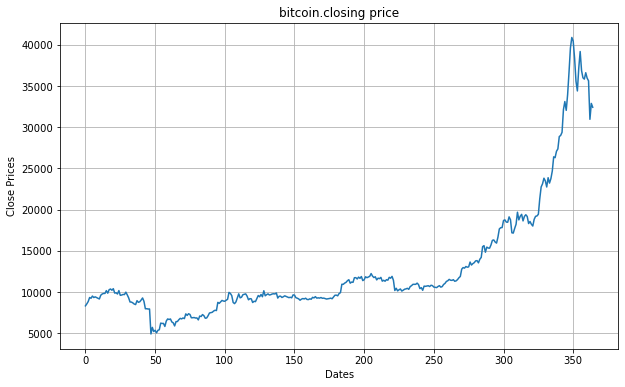

In [97]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['close'])
plt.title('bitcoin.closing price')
plt.show()

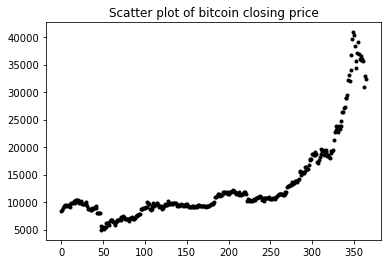

In [99]:
# scatter plot 
df_close = df['close']
df_close.plot(style='k.')
plt.title('Scatter plot of bitcoin closing price')
plt.show()

In [100]:
# check if a series is staionary or not(Augmented Dickey-Fuller)Test
# null hypotheisi: the series has no unit root 
# alnaterive hypothesis: the series has unit root

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

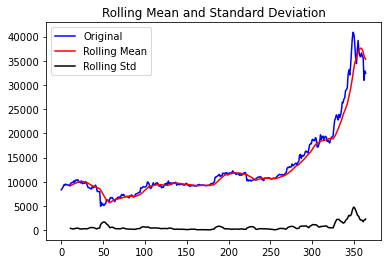

Results of dickey fuller test
Test Statistics                  0.346924
p-value                          0.979398
No. of lags used                 6.000000
Number of observations used    358.000000
critical value (1%)             -3.448749
critical value (5%)             -2.869647
critical value (10%)            -2.571089
dtype: float64


In [101]:
test_stationarity(df_close)

<Figure size 432x288 with 0 Axes>

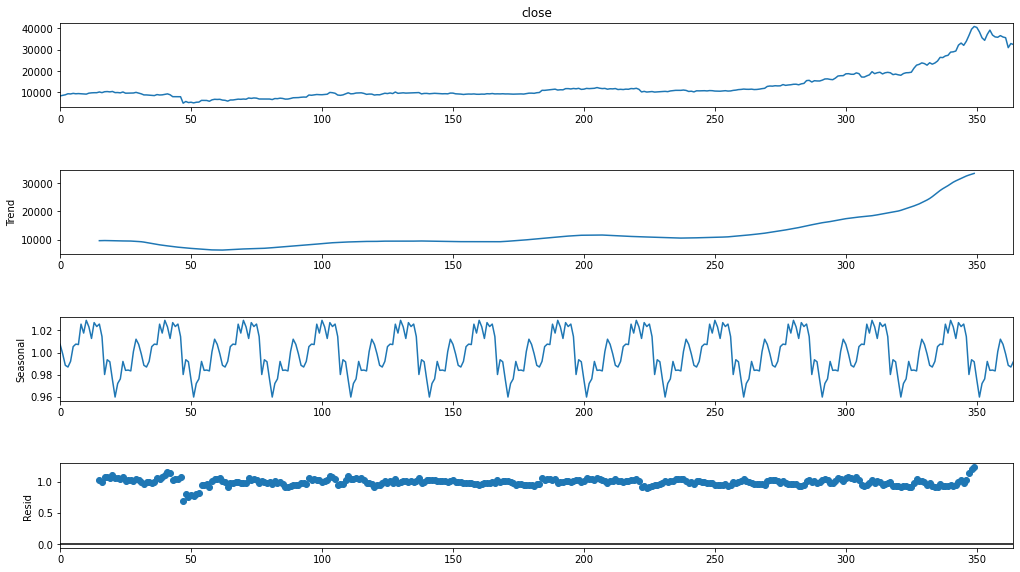

In [103]:
# separte trend by using seasonal decompose 
result = seasonal_decompose(df_close, model= 'multiplicative',freq =30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


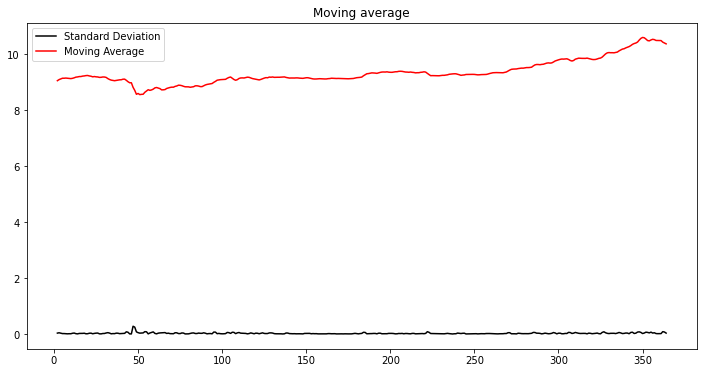

In [147]:
rcParams['figure.figsize'] = 12, 6
df_log = np.log(df_close)
moving_average = df_log.rolling(3).mean()
std_dev = df_log.rolling(3).std()
plt.legend(loc = 'right')
plt.title('Moving average')
plt.plot(std_dev, color = 'black', label = 'Standard Deviation')
plt.plot(moving_average, color ='red', label ='Moving Average')
plt.legend()
plt.show()

In [150]:
# split data into train and test 

train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]


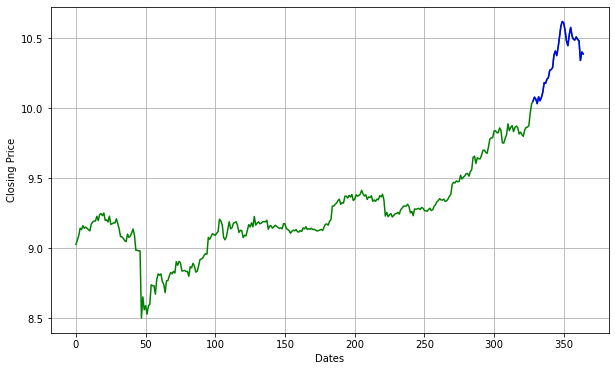

In [156]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel('Closing Price')
plt.plot(df_log, 'green', label = "Train")
plt.plot(test_data, 'blue', label = "Test")

In [158]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1120.761, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1130.901, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1128.932, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1121.422, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1131.670, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-1131.603, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1132.436, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1134.434, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1132.436, Time=0.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1129.598, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1130.438, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1134.714, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1129.023, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1130.972, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0

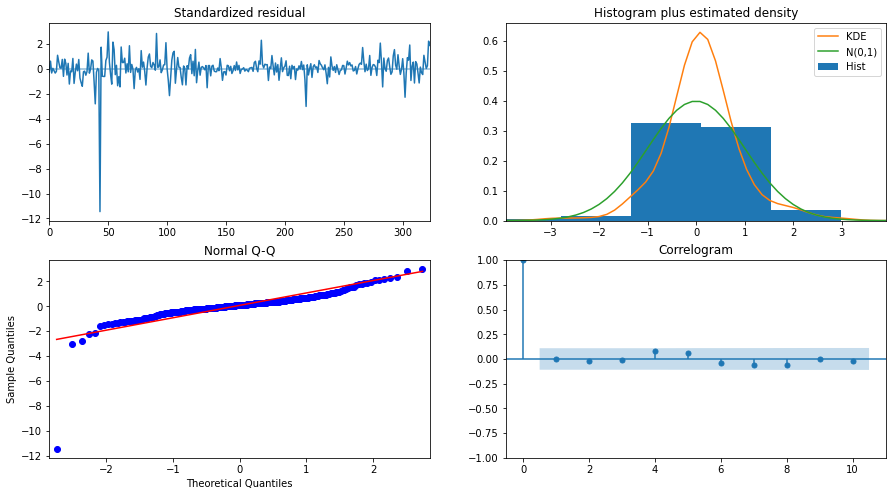

In [159]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [160]:
model = ARIMA(train_data, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  324
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 571.218
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sat, 23 Jan 2021   AIC                          -1134.436
Time:                        22:36:37   BIC                          -1119.313
Sample:                             1   HQIC                         -1128.400
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0028      0.002      1.315      0.189      -0.001       0.007
ar.L1.D.close    -0.7337      0.122     -6.017      0.000      -0.973      -0.495
ma.L1.D.close     0.5733      0.146     

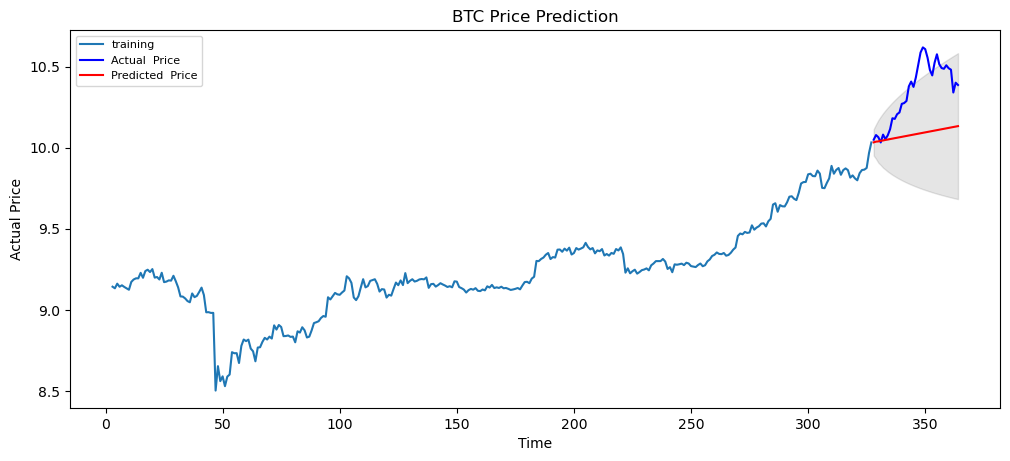

In [164]:
# forecast
fc, se, conf = fitted.forecast(37, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual  Price')
plt.plot(fc_series, color = 'red',label='Predicted  Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [163]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.09436671729331189
MAE: 0.26187620395459993
RMSE: 0.3071916621480992
MAPE: 0.02504562360983371
